In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


Summary = pd.read_excel('~/Desktop/Projects/RAYSE ACADEMY/Khan.Academy.August/Khan Academy Report -- 08-05-1970 to 08-31-2018.xlsx',
                        sheetname='Summary')
Mis_Spec = pd.read_excel('~/Desktop/Projects/RAYSE ACADEMY/Khan.Academy.August/Khan Academy Report -- 08-05-1970 to 08-31-2018.xlsx',
                         sheetname='Mission-specific')
Exercises = pd.read_excel('~/Desktop/Projects/RAYSE ACADEMY/Khan.Academy.August/Khan Academy Report -- 08-05-1970 to 08-31-2018.xlsx',
                        sheetname='Exercises')
Videos = pd.read_excel('~/Desktop/Projects/RAYSE ACADEMY/Khan.Academy.August/Khan Academy Report -- 08-05-1970 to 08-31-2018.xlsx',
                        sheetname='Videos')
Points = pd.read_excel('~/Desktop/Projects/RAYSE ACADEMY/Khan.Academy.August/Khan Academy Report -- 08-05-1970 to 08-31-2018.xlsx',
                        sheetname='Points')
Badges = pd.read_excel('~/Desktop/Projects/RAYSE ACADEMY/Khan.Academy.August/Khan Academy Report -- 08-05-1970 to 08-31-2018.xlsx',
                        sheetname='Badges')
Skills = pd.read_excel('~/Desktop/Projects/RAYSE ACADEMY/Khan.Academy.August/Khan Academy Report Skill Progress.xlsx')




In [11]:
### Data from Roster page inserted
Roster = pd.read_excel('~/Desktop/Projects/RAYSE ACADEMY/Khan.Academy.August/Roster.xlsx',
                        sheetname='ROA')

Attendance = pd.read_excel('~/Desktop/Projects/RAYSE ACADEMY/Khan.Academy.August/Roster.xlsx',
                        sheetname='Attendance')

In [22]:
Summary.shape

(219, 14)

In [21]:
Attendance.shape

(181, 199)

__NOTES__
When data is extracted from Khan Academy, there are 219 students registered to the Monitor account, while the Kalcutta academy only has 181 students registered. The discrepancy is mostly due to students who no longer attend the academy but who's KA account have  been purged from the list of accounts linked to the monitor account.

Taking the list of students currently on the roster, the KA accounts are filtered for those who are currently still attending the Kalcutta academy.

In [24]:
#Filter for list of students who are no longer on the roster

cur_roster = Attendance.ID

ka_roster = Summary.Student[Summary.Student.isin(cur_roster)]

## How many rows of students returned
ka_roster.shape


(165,)

__NOTES__

While the academy has 181 students on their roster, there were only 165 accounts on KA who had matching ccu~ IDs with the list of IDs on the roster. 

 __NOTES__
 
 the data extracted from KA includes information on the exercises completed by students that are not part of the 3rd grade curriculum. This implies that the 'Total Minutes' column in the Summary sheet is not truly reflective of how much time students have spent on the 3rd grade mission. 
 
To better assess how long each student has spent on the 3rd grade mission, one strategy is to filter the Exercises sheet for the 165 currently registered students, and then filter for the exercises that are part of the 3rd grade mission. Grouping by student should give a better assessment of time spent by student.


In [36]:
### Filter students currently on the Roster
cur_ex = Exercises[Exercises.Student.isin(cur_roster)]


z = len(cur_ex.Student.unique())

print('The number of registered student accounts who have attemped one exercise is ' + str(z) )

The number of registered student accounts who have attemped one exercise is 134


__NOTES__

While there are 165 students from the current roster who have an account on KA, only 134 have any record of attempting a exercise.



In [37]:
####Filter for  only the exercises that are part of the 3rd grade mission 
grade3_ex=  cur_ex[cur_ex.Exercise.isin(Skills.Exercise)]




#are there exercises in the 3rd grade mission that no student has yet attempted?

print ('the number of exerises/skills in the 3rd grade mission is ' +  str(len(Skills)))

zz = len(grade3_ex['Exercise'].unique())

print ('the number of 3rd grade mission skills attempted by at least one student is  ' +  str(zz))


qq = Skills[~Skills.Exercise.isin(grade3_ex.Exercise)]



the number of exerises/skills in the 3rd grade mission is 115
the number of 3rd grade mission skills attempted by at least one student is  115


In [98]:
######## Create a total minutes spent(total_Time_on_Mis) on Mission Collumn

ccu01c = Mis_Spec

m = grade3_ex[['Student','Time Spent (min)']].groupby(by='Student').sum()

m.reset_index(inplace=True) 

ccu01c = pd.merge(ccu01c, m,how='left', on='Student')


ccu01c.rename(columns={'Time Spent (min)': 'Total_Time_on_Mis'}, inplace=True)



In [109]:
ccu01c.head()

,Student,Struggling,Needs Practice,Practiced,Level 1,Level 2,Mastered,Total_Time_on_Mis,Total_Hrs_on_Mis,Total_Wks_on_Mis,Progress,Benchmark Status
0,bod,0,3,0,0,3,0,NaN,NaN,NaN,0.019565,None
1,ccu01s055,0,0,1,0,2,101,NaN,NaN,NaN,0.893478,None
2,ccu01s056,0,0,0,0,0,104,1975.150000,32.919167,10.973056,0.904348,"Mission passed, move to next mission"
3,ccu01s057,16,3,0,0,0,82,1429.950000,23.832500,7.944167,0.713043,must improve on mission
4,ccu01s058,5,5,1,1,0,86,928.966667,15.482778,5.160926,0.752174,must improve on mission


In [58]:
ccu01c["Total_Time_on_Mis"].describe()

count     133.000000
mean      700.004887
std       767.697929
min         0.600000
25%        40.550000
50%       454.283333
75%      1062.733333
max      2904.116667
Name: Total_Time_on_Mis, dtype: float64

__NOTES__


The Time given is in minutes, but the proposed benchmarks are in hours and weeks, so 2 new columns need to be created to show how many hours and weeks each student has spend on the 3rd grade mission. A week of attendance at the academy is two sessions of 1.5 hours each, totaling three hours, so to calculate weeks spent on KA every 3 hours spent by a student is counted as one week.


__Shoould weeks be counted as 1 for every 3 hours spent on the platform, if students are not solely using KA during their bi-weekly sessions at the Academy?__ 




In [100]:
#####Creating a totalHours spent on Mission Collumn
def myHours (x):
    q = x/60
    return q

hold= ccu01c['Total_Time_on_Mis'].apply(myHours)

hold.rename("Total_Hrs_on_Mis",inplace=True)
ccu01c = pd.concat([ccu01c,hold], axis =1)

In [101]:
#####Creating a totalWeeks spent on Mission Collumn
## Student spend 3 hours at the academy a week

def myWeeks (x):
    q = x/3
    return q

mold= ccu01c['Total_Hrs_on_Mis'].apply(myWeeks)

mold.rename("Total_Wks_on_Mis",inplace=True)
ccu01c = pd.concat([ccu01c,mold], axis =1)

ccu01c["Total_Wks_on_Mis"].describe()

count    133.000000
mean       3.888916
std        4.264988
min        0.003333
25%        0.225278
50%        2.523796
75%        5.904074
max       16.133981
Name: Total_Wks_on_Mis, dtype: float64

__NOTES__

the following optional features are to assess the longest, shortest, and average amount of time each student has spent on a skill for the third grade mission.

In [ ]:
### Time spent by Student per exercise

i = grade3_ex[['Student','Time Spent (min)']].groupby(by='Student').max()
w = grade3_ex[['Student','Time Spent (min)']].groupby(by='Student').min()
e = grade3_ex[['Student','Time Spent (min)']].groupby(by='Student').mean()
r = grade3_ex[['Student','Time Spent (min)']].groupby(by='Student').median()

i.reset_index(inplace=True) 
w.reset_index(inplace=True) 
e.reset_index(inplace=True) 
r.reset_index(inplace=True) 


i.rename(columns={'Time Spent (min)': 'Ex.time.max'}, inplace=True)
w.rename(columns={'Time Spent (min)': 'Ex.time.min'}, inplace=True)
e.rename(columns={'Time Spent (min)': 'ex.time.avg'}, inplace=True)
r.rename(columns={'Time Spent (min)': 'ex.time.median'}, inplace=True)

ccu01c = pd.merge(ccu01c, i,how='left', on='Student')
ccu01c = pd.merge(ccu01c, w,how='left', on='Student')
ccu01c = pd.merge(ccu01c, e,how='left', on='Student')
ccu01c = pd.merge(ccu01c, r,how='left', on='Student')

__NOTES__

A progress column is created based on the same calculations given by KA and ZAID.

In [103]:
##### Create a progress collumn

nSkills = len(Skills)

def prog(a,b,c,d,e):
    mastered = a *4
    level2 = b *3
    level1 = c * 1
    practiced = d*1
    per = (mastered+level2+level1+practiced)/(4*e)
    return per

c = prog(Mis_Spec.Mastered,Mis_Spec['Level 2'],Mis_Spec['Level 1'],Mis_Spec.Practiced,nSkills)

ccu01c = pd.concat([ccu01c,c], axis =1)



In [104]:
# Rename Progress column

ccu01c.rename(columns={0: 'Progress'}, inplace=True)
ccu01c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 0 to 218
Data columns (total 11 columns):
Student              219 non-null object
Struggling           219 non-null int64
Needs Practice       219 non-null int64
Practiced            219 non-null int64
Level 1              219 non-null int64
Level 2              219 non-null int64
Mastered             219 non-null int64
Total_Time_on_Mis    133 non-null float64
Total_Hrs_on_Mis     133 non-null float64
Total_Wks_on_Mis     133 non-null float64
Progress             219 non-null float64
dtypes: float64(4), int64(6), object(1)
memory usage: 20.5+ KB


In [105]:
ccu01c['Total_Wks_on_Mis'].describe()

count    133.000000
mean       3.888916
std        4.264988
min        0.003333
25%        0.225278
50%        2.523796
75%        5.904074
max       16.133981
Name: Total_Wks_on_Mis, dtype: float64

__NOTES__


The Curriculum Dev team has provided a set of benchmarks to measure how students are performing based on how long they've been working on the 3rd grade mission. These benchmarks can be found on the "Rayse Curriculum outline and Benchmarks" document on the google drive under Rayse Academy > Curriculum Development > Rayse Curriculum and Benchmarks.


In [106]:
### measuring against benchmarks


def bench(x):
    if x['Total_Wks_on_Mis'] < 1:
        return 'Under 1 Week of time spent'
    elif x['Total_Wks_on_Mis'] <= 4 and x['Total_Wks_on_Mis'] > 1:
        if x['Progress'] < 0.32 or x['Struggling'] > 0:
            return 'struggling'
        elif x['Progress'] > 0.6 and x['Struggling'] ==0:
            return 'advanced'
    elif x['Total_Wks_on_Mis'] > 4:
        if x['Progress'] > 0.75 and x['Struggling']==0 and x['Needs Practice'] == 0:
            return 'Mission passed, move to next mission'
        else:
            return 'must improve on mission' 

x = ccu01c.apply(bench,axis=1)


In [107]:
ccu01c = pd.concat([ccu01c,x], axis =1)

In [108]:
ccu01c.rename(columns={0: 'Benchmark Status'}, inplace=True)

In [110]:
## Filter for the students currently on the roster

ka_roster_mis = ccu01c[ccu01c.Student.isin(ka_roster)]

s.shape

w = ka_roster_mis['Benchmark Status'].value_counts()
w

Under 1 Week of time spent              52
must improve on mission                 49
struggling                              30
Mission passed, move to next mission     2
Name: Benchmark Status, dtype: int64

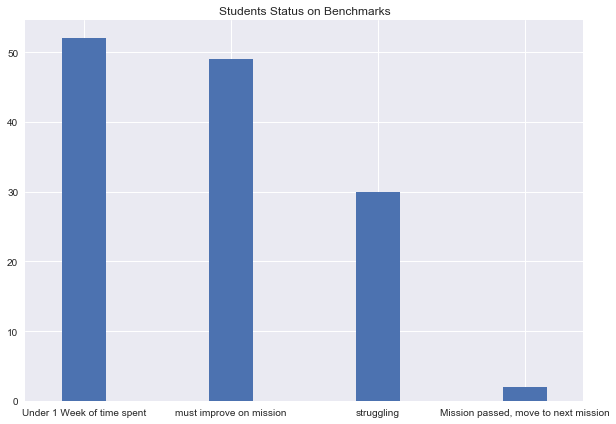

In [122]:
import matplotlib.pyplot as plt
w.plot(kind='bar',width=0.3,figsize=(10,7))
plt.xticks(rotation=0)
plt.title('Students Status on Benchmarks')

plt.show()

In [112]:
ka_roster_mis


,Student,Struggling,Needs Practice,Practiced,Level 1,Level 2,Mastered,Total_Time_on_Mis,Total_Hrs_on_Mis,Total_Wks_on_Mis,Progress,Benchmark Status
2,ccu01s056,0,0,0,0,0,104,1975.150000,32.919167,10.973056,0.904348,"Mission passed, move to next mission"
3,ccu01s057,16,3,0,0,0,82,1429.950000,23.832500,7.944167,0.713043,must improve on mission
4,ccu01s058,5,5,1,1,0,86,928.966667,15.482778,5.160926,0.752174,must improve on mission
7,ccu01s088,18,7,0,0,0,74,1759.116667,29.318611,9.772870,0.643478,must improve on mission
9,ccu01s285,11,4,0,1,0,89,1894.733333,31.578889,10.526296,0.776087,must improve on mission
12,ccu01s094,3,4,0,0,0,106,2119.283333,35.321389,11.773796,0.921739,must improve on mission
13,ccu01s066,1,0,0,0,1,102,1533.466667,25.557778,8.519259,0.893478,must improve on mission
16,ccu01s070,11,14,0,0,0,64,916.866667,15.281111,5.093704,0.556522,must improve on mission
17,ccu01s071,8,13,0,0,0,50,479.383333,7.989722,2.663241,0.434783,struggling
18,ccu01s100,10,15,0,0,0,61,752.916667,12.548611,4.182870,0.530435,must improve on mission
